In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
from sklearn.metrics import accuracy_score
X_train = pd.read_csv('X_Train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('Y_train.csv')

In [44]:
X_train.head()

,id,patient_no,cast,gender,age group,weight,admission_typeid,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,122283168,113223627,Caucasian,Female,[80-90),?,1,1,7,4,...,No,No,No,No,No,No,No,No,No,Yes
1,97835454,25776306,Caucasian,Female,[80-90),?,5,3,17,3,...,No,No,Steady,No,No,No,No,No,No,Yes
2,431347352,42491844,Caucasian,Male,[50-60),?,3,1,1,1,...,No,No,Steady,No,No,No,No,No,No,Yes
3,153301914,87104907,Caucasian,Female,[70-80),?,5,3,1,3,...,No,No,No,No,No,No,No,No,No,No
4,304851608,70844364,Caucasian,Female,[90-100),?,1,3,7,5,...,No,No,Steady,No,No,No,No,No,No,Yes


# Data Preprocessing

In [45]:
#Checking if any missing Values
X_train.isnull().values.any()

False

In [46]:
#Dropping columns which likely have no effect
X_train = X_train.drop(columns=['id','patient_no','weight','payer_code','medical_specialty', 'admission_typeid','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult'])

In [47]:
X_train.head()

,cast,gender,age group,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,Caucasian,Female,[80-90),4,44,0,15,4,0,0,...,No,No,No,No,No,No,No,No,No,Yes
1,Caucasian,Female,[80-90),3,15,1,20,0,0,0,...,No,No,Steady,No,No,No,No,No,No,Yes
2,Caucasian,Male,[50-60),1,45,1,18,0,0,1,...,No,No,Steady,No,No,No,No,No,No,Yes
3,Caucasian,Female,[70-80),3,52,0,14,12,1,0,...,No,No,No,No,No,No,No,No,No,No
4,Caucasian,Female,[90-100),5,62,0,12,0,0,2,...,No,No,Steady,No,No,No,No,No,No,Yes


In [48]:
X_train.shape

(71236, 39)

# Checking and Filling missing Values

In [49]:
X_train=X_train.replace({'?':None})

In [50]:
X_train=X_train.replace({None:np.nan})


<AxesSubplot:>

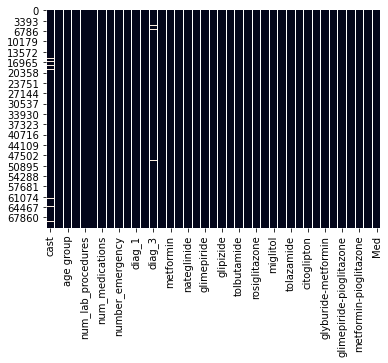

In [51]:
sns.heatmap(X_train.isnull(), cbar=False)

In [11]:
X_train.isnull().sum()

cast                        1620
gender                         0
age group                      0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
diag_1                        15
diag_2                       262
diag_3                       998
number_diagnoses               0
metformin                      0
repaglinide                    0
nateglinide                    0
chlorpropamide                 0
glimepiride                    0
acetohexamide                  0
glipizide                      0
glyburide                      0
tolbutamide                    0
pioglitazone                   0
rosiglitazone                  0
acarbose                       0
miglitol                       0
troglitazone                   0
tolazamide                     0
examide                        0
citoglipto

<AxesSubplot:>

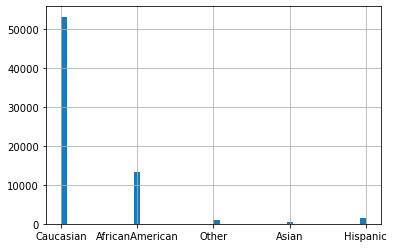

In [52]:
X_train['cast'].hist(bins=50)

In [53]:
X_train['diag_1'] =pd.to_numeric(X_train['diag_1'], errors='coerce')
X_train['diag_2'] =pd.to_numeric(X_train['diag_2'], errors='coerce')
X_train['diag_3'] =pd.to_numeric(X_train['diag_3'], errors='coerce')

<AxesSubplot:>

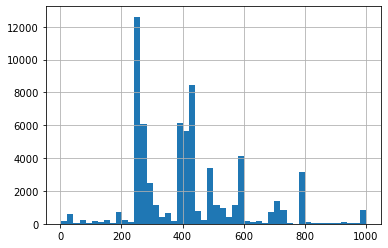

In [54]:
X_train['diag_3'].hist(bins=50)

In [55]:
X_train['diag_1'] = X_train['diag_1'].fillna(X_train['diag_1'].mean())
X_train['diag_2'] = X_train['diag_2'].fillna(X_train['diag_2'].mean())
X_train['diag_3'] = X_train['diag_3'].fillna(X_train['diag_3'].mean())

In [56]:
X_train['cast']= X_train['cast'].fillna('Other')

In [57]:
X_train.isnull().sum()

cast                        0
gender                      0
age group                   0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-

In [58]:
X_train.head()

,cast,gender,age group,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,Caucasian,Female,[80-90),4,44,0,15,4,0,0,...,No,No,No,No,No,No,No,No,No,Yes
1,Caucasian,Female,[80-90),3,15,1,20,0,0,0,...,No,No,Steady,No,No,No,No,No,No,Yes
2,Caucasian,Male,[50-60),1,45,1,18,0,0,1,...,No,No,Steady,No,No,No,No,No,No,Yes
3,Caucasian,Female,[70-80),3,52,0,14,12,1,0,...,No,No,No,No,No,No,No,No,No,No
4,Caucasian,Female,[90-100),5,62,0,12,0,0,2,...,No,No,Steady,No,No,No,No,No,No,Yes


# Label Encoding the Dataset

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X_train = X_train.apply(LabelEncoder().fit_transform)


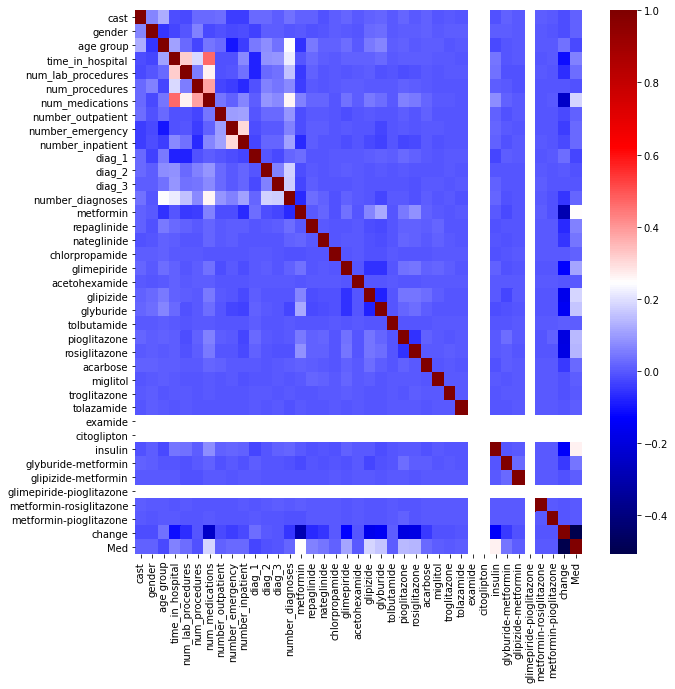

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(data=X_train.corr(), cmap="seismic")
plt.show();

# Feature Extraction

<ipython-input-61-648bab733eba>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


[3.07105265e-02 2.22206664e-02 6.84989722e-02 7.47774172e-02
 9.45833457e-02 4.87362156e-02 9.14496405e-02 3.38588806e-02
 2.50721165e-02 5.65859373e-02 9.12757251e-02 9.13074399e-02
 9.05424914e-02 5.60048022e-02 1.66189362e-02 4.32780426e-03
 2.58311459e-03 4.19365475e-04 1.04297237e-02 1.75776591e-05
 1.61462102e-02 1.43907337e-02 7.71004935e-05 1.15137324e-02
 1.10448358e-02 1.18021043e-03 2.45592533e-04 3.05622754e-05
 2.20566469e-04 0.00000000e+00 0.00000000e+00 2.16175264e-02
 2.48761766e-03 7.57772446e-05 0.00000000e+00 4.91719964e-06
 2.45864831e-06 7.59072168e-03 3.35073798e-03]


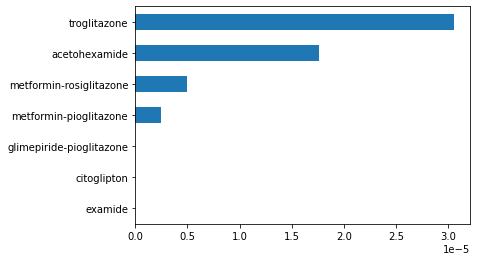

In [61]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(7).plot(kind='barh')
plt.show()

In [62]:
feat_importances.nsmallest(7)

examide                     0.000000
citoglipton                 0.000000
glimepiride-pioglitazone    0.000000
metformin-pioglitazone      0.000002
metformin-rosiglitazone     0.000005
acetohexamide               0.000018
troglitazone                0.000031
dtype: float64

In [63]:
X_train = X_train.drop(['examide','citoglipton','glimepiride-pioglitazone','metformin-pioglitazone','metformin-rosiglitazone',
                      'acetohexamide','troglitazone'],axis=1)

In [64]:
X_train.shape

(71236, 32)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size = 0.30)


# Model Training

In [66]:
clf = GradientBoostingClassifier().fit(X_train, y_train)

C:\Users\danis\anaconda3\envs\deepenv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [67]:
pred = clf.predict(X_test)

In [68]:
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

Accuracy: 0.579


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))


<ipython-input-69-10a91a866544>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy: 0.565


In [70]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
pred = xgb_clf.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

[15:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\danis\anaconda3\envs\deepenv\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\danis\anaconda3\envs\deepenv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.576


In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

<ipython-input-71-c8f6eace46b6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,y_train)


Accuracy: 0.466


In [72]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print('Accuracy: {:.3f}'.format(accuracy_score(y_test, pred)))

C:\Users\danis\anaconda3\envs\deepenv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.563


C:\Users\danis\anaconda3\envs\deepenv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Predicting

In [73]:
X_TEST = pd.read_csv('X_test.csv')
X_TEST = X_TEST.drop(columns=['id','patient_no','weight','payer_code','medical_specialty', 'admission_typeid','discharge_disposition_id','admission_source_id','max_glu_serum','A1Cresult'])
X_TEST=X_TEST.replace({'?':None})
X_TEST=X_TEST.replace({None:np.nan})
X_TEST.head()

,cast,gender,age group,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,Med
0,Caucasian,Male,[80-90),7,22,1,13,2,0,0,...,No,No,No,No,No,No,No,No,No,Yes
1,Caucasian,Female,[90-100),6,65,0,14,0,0,1,...,No,No,No,No,No,No,No,No,No,No
2,AfricanAmerican,Female,[50-60),4,44,1,16,0,0,1,...,No,No,Steady,No,No,No,No,No,Ch,Yes
3,AfricanAmerican,Female,[60-70),5,37,6,27,0,2,0,...,No,No,Steady,No,No,No,No,No,No,Yes
4,Caucasian,Male,[20-30),4,52,0,13,0,0,3,...,No,No,Steady,No,No,No,No,No,No,Yes


In [74]:

X_TEST['diag_1'] =pd.to_numeric(X_TEST['diag_1'], errors='coerce')
X_TEST['diag_2'] =pd.to_numeric(X_TEST['diag_2'], errors='coerce')
X_TEST['diag_3'] =pd.to_numeric(X_TEST['diag_3'], errors='coerce')


In [75]:

X_TEST['diag_1'] = X_TEST['diag_1'].fillna(X_TEST['diag_1'].mean())
X_TEST['diag_2'] = X_TEST['diag_2'].fillna(X_TEST['diag_2'].mean())
X_TEST['diag_3'] = X_TEST['diag_3'].fillna(X_TEST['diag_3'].mean())
X_TEST['cast']= X_TEST['cast'].fillna('Other')


In [76]:

X_TEST = X_TEST.drop(['examide','citoglipton','glimepiride-pioglitazone','metformin-pioglitazone','metformin-rosiglitazone',
                      'acetohexamide','troglitazone'],axis=1)

In [77]:
X_TEST = X_TEST.apply(LabelEncoder().fit_transform)


In [78]:
pred = clf.predict(X_TEST)

In [79]:
pred

array(['NO', 'NO', '>5', ..., '>5', 'NO', 'NO'], dtype=object)

In [81]:

pred = pd.DataFrame(pred, columns=['label'])
pred.index +=1
pred


,label
1,NO
2,NO
3,>5
4,NO
5,>5
...,...
30526,>5
30527,NO
30528,>5
30529,NO


In [83]:
pred.to_csv('result.csv', index_label='Id')